In [7]:
from deepSculpt.sculptor import Sculptor
from deepSculpt.plotter import Plotter
from deepSculpt.preprocessing import one_hot_encoder_decoder, binary_encoder_decoder

# from deepSculpt.params import *
# from deepSculpt.model import Generative_Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from stl import mesh

STYLE = "#ffffff"

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
void_dim = 48 # greenyellow, chartreuse, mediumpurple, orange, crimson, turquoise, gold

sculptor = Sculptor(void_dim = void_dim,
                    n_edge_elements = 0,
                    n_plane_elements = 1,
                    n_volume_elements = 10,
                    color_edges = "dimgrey",
                    color_planes = "snow",
                    color_volumes = ["crimson", "turquoise", "gold", "greenyellow","mediumpurple"],
                    element_edge_min= int(void_dim*0.8),
                    element_edge_max = int(void_dim*0.9),
                    element_grid_min = int(void_dim*0.9),
                    element_grid_max = int(void_dim*0.95),
                    element_plane_min = int(void_dim*0.4),
                    element_plane_max = int(void_dim*0.8),
                    element_volume_min = int(void_dim*0.2),
                    element_volume_max = int(void_dim*0.5),
                    step = 1,
                    verbose = False)

# sculptor.plot_sculpture()

Time for sculptures is 0.012563228607177734 sec


In [13]:
sculpture = sculptor.generative_sculpt()

preprocessing_class_o = one_hot_encoder_decoder(sculpture[1], 48)

encoded = preprocessing_class_o.ohe_encoder()

decoded = preprocessing_class_o.ohe_decoder(encoded[0])

decoded[0].shape

(48, 48, 48)

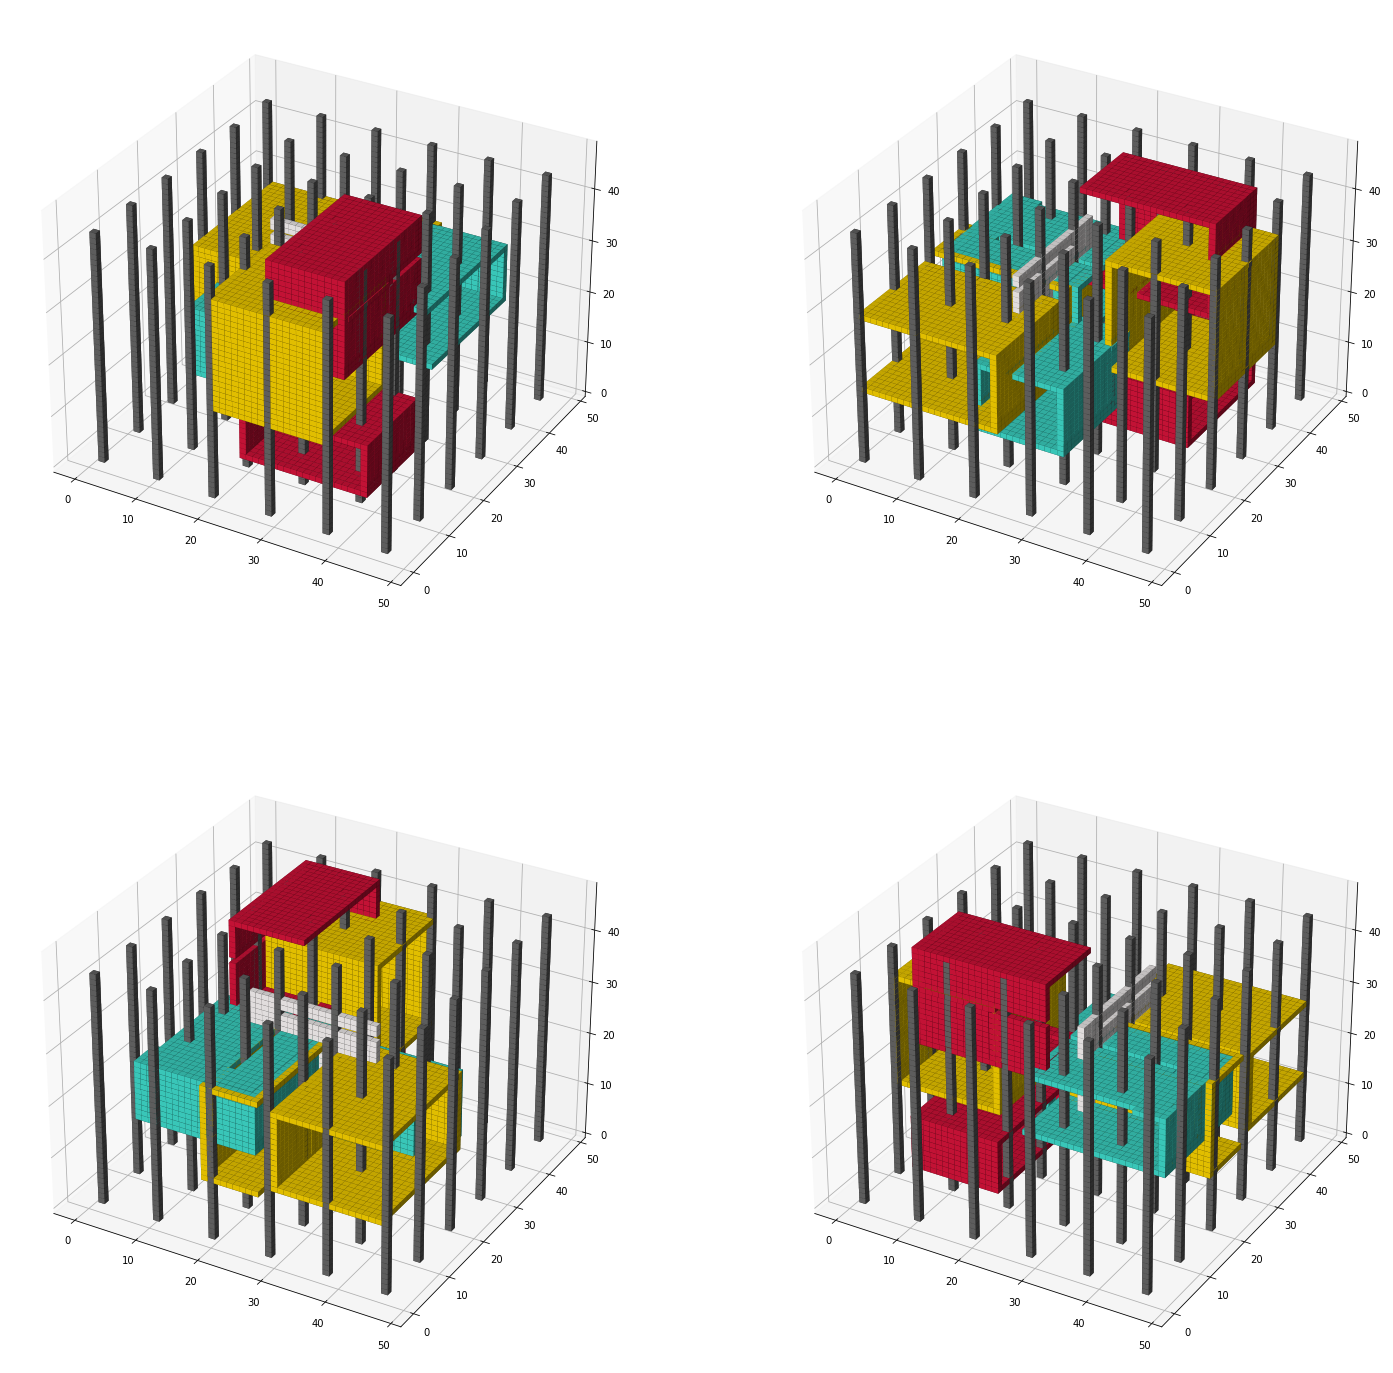

In [14]:
plotter = Plotter(decoded, "#ffffff")

plotter.plot_sculpture()

In [16]:
sculpture = sculptor.generative_sculpt()

preprocessing_class_b = binary_encoder_decoder(sculpture[1], 48)

encoded = preprocessing_class_b.binary_encoder()

decoded = preprocessing_class_b.binary_decoder(encoded[0])

decoded[1].shape

(48, 48, 48)

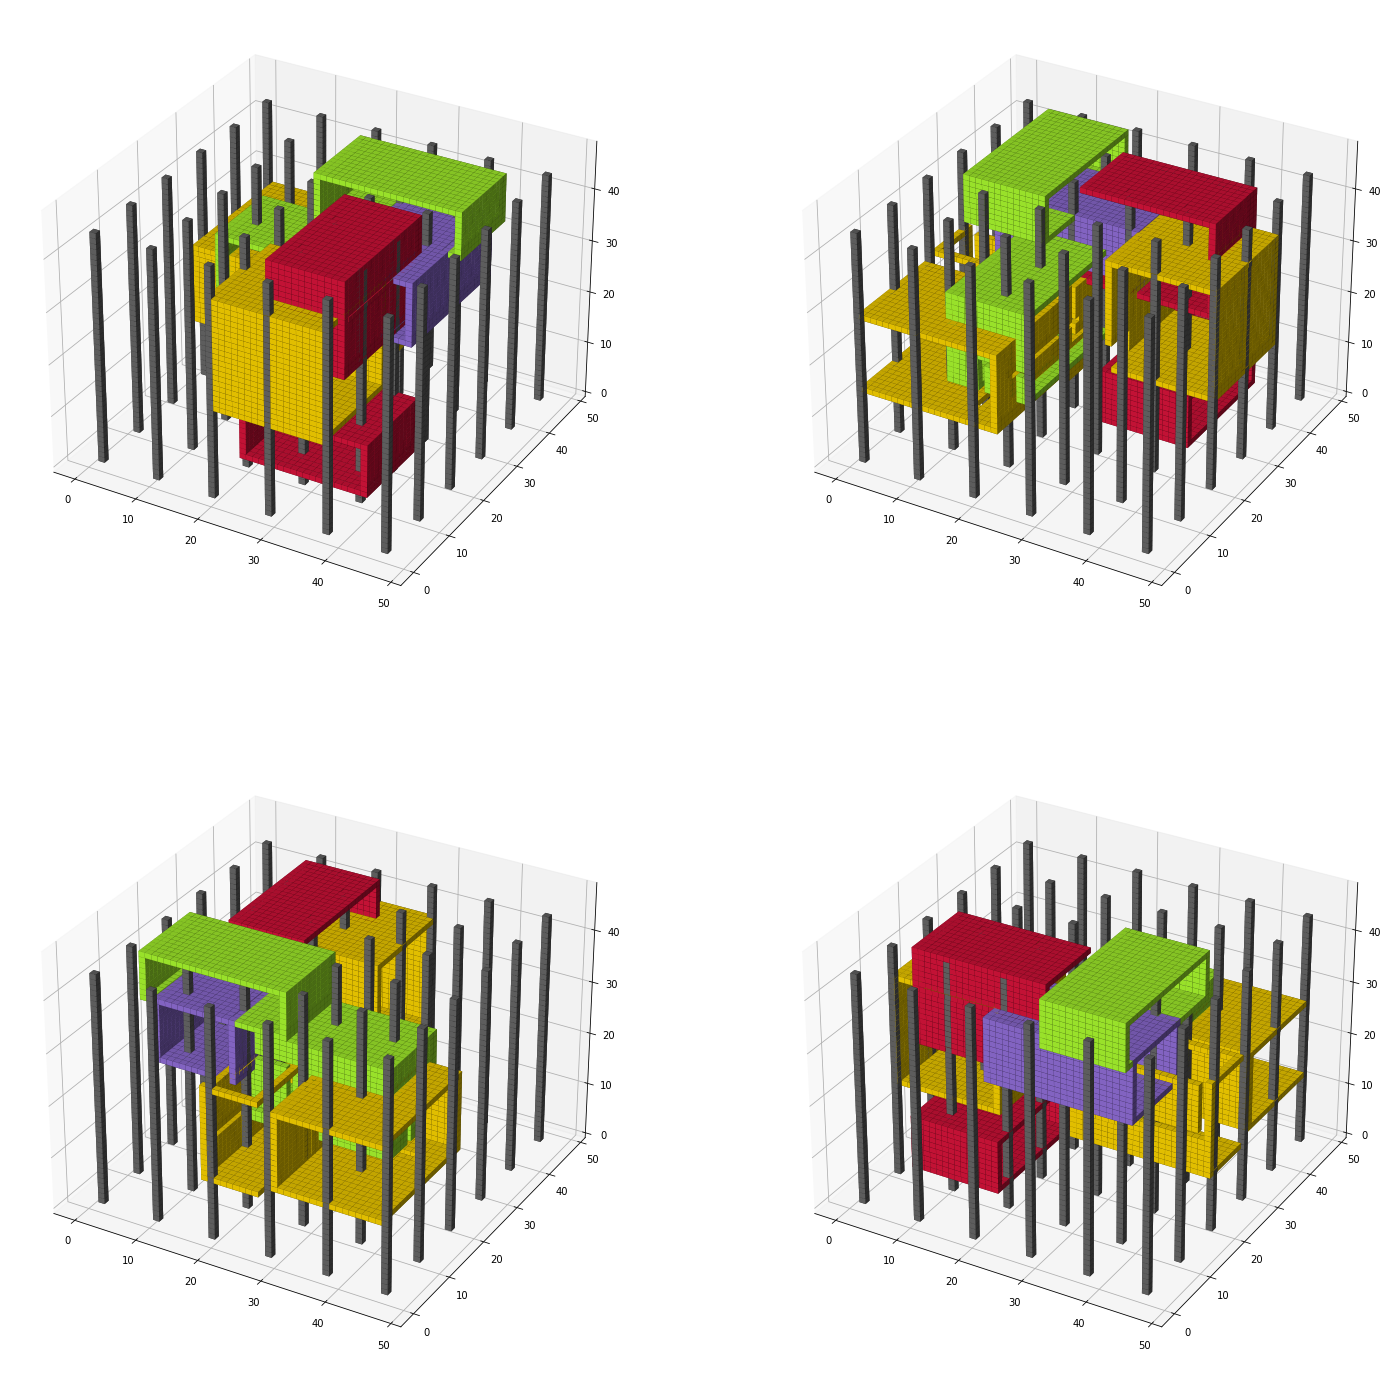

In [17]:
plotter = Plotter(decoded, "#ffffff")

plotter.plot_sculpture()